In [1]:
import lbg_forecast.modified_redshift as mz
import matplotlib.pyplot as plt
import jax.numpy as jnp

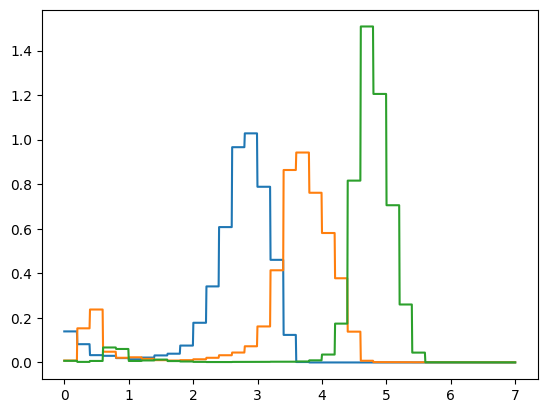

In [2]:
u = mz.u_dropout([0]*12)
g = mz.g_dropout([0]*12)
r = mz.r_dropout([0]*12)

plt.plot(jnp.linspace(0, 7, 1000), u.pz_fn(jnp.linspace(0, 7, 1000)))
plt.plot(jnp.linspace(0, 7, 1000), g.pz_fn(jnp.linspace(0, 7, 1000)))
plt.plot(jnp.linspace(0, 7, 1000), r.pz_fn(jnp.linspace(0, 7, 1000)))

In [3]:
u.pz_fn(1)

Array([0.01446236], dtype=float32)